In [1]:
import numpy as np

img_height , img_width = [256,256]  # Making Every Image as same cordinates:




original_path = '/content/drive/MyDrive/Multi dataset '

train_data_path = '/content/drive/MyDrive/Multi dataset /train'

test_data_path = '/content/drive/MyDrive/Multi dataset /test'




`using glob lets find how many labels are there for training purpose:`

In [2]:
import glob 
from glob import glob 
glob('/content/drive/MyDrive/Multi dataset /train/*')


['/content/drive/MyDrive/Multi dataset /train/NORMAL',
 '/content/drive/MyDrive/Multi dataset /train/PNEUMONIA',
 '/content/drive/MyDrive/Multi dataset /train/COVID19']

In [3]:
glob('/content/drive/MyDrive/Multi dataset /test/*')

['/content/drive/MyDrive/Multi dataset /test/PNEUMONIA',
 '/content/drive/MyDrive/Multi dataset /test/NORMAL',
 '/content/drive/MyDrive/Multi dataset /test/COVID19']

**Image_Data_generator**

`Lets import required Packages:` 

In [4]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
preprocess_train_data = ImageDataGenerator(rescale = 1./255,
                                           shear_range = 0.2,
                                           horizontal_flip = True,
                                           zoom_range = 0.2)


preprocess_test_data = ImageDataGenerator(rescale = 1./255)

In [6]:
labels = ['COVID19','NORMAL','PNEUMONIA']


In [7]:
train_data = preprocess_train_data.flow_from_directory(train_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'categorical' , batch_size = 32)



Found 5159 images belonging to 3 classes.


In [8]:
test_data =  preprocess_test_data.flow_from_directory(test_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'categorical' , batch_size = 32)

Found 1288 images belonging to 3 classes.


**Developing Architecture**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax


(1482, 1982, 3)


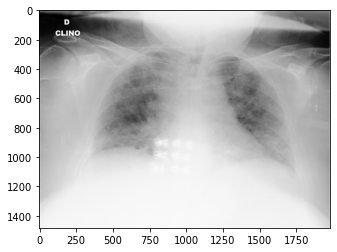

In [10]:
import matplotlib.pyplot as plt 
ima = plt.imread('/content/drive/MyDrive/Multi dataset /train/COVID19/COVID19(1).jpg')
plt.imshow(ima)
print(ima.shape)

In [11]:

model = Sequential()
# first kernel and max poo layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (img_height,img_width,3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# second kernel and max poo layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# third kernel and max poo layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# forth kernel and max poo layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) # one dimensional array
# above 1d data give to ANN 
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2
# output layer 
model.add(Dense(3,activation='softmax'))



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [13]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics = ['Accuracy'])

In [ ]:
model.fit(train_data , epochs = 1)              

160/162 [============================>.] - ETA: 20s - loss: 0.6891 - Accuracy: 0.7146

In [18]:
d = model.predict(test_data)

41/41 [==============================] - 32s 769ms/step


In [17]:
# creating validation report:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
d

array([[0.04140198, 0.05890083, 0.89969724],
       [0.00121947, 0.04471382, 0.95406675],
       [0.04377732, 0.03794545, 0.91827726],
       ...,
       [0.01209413, 0.10678425, 0.8811216 ],
       [0.02019762, 0.2629541 , 0.71684825],
       [0.03716831, 0.4513507 , 0.511481  ]], dtype=float32)

In [21]:
a = np.array([[1,3,4]])
np.argmax(a , axis = 1)


array([2])

In [22]:
predicted_points = np.argmax(d , axis = 1)

In [23]:
predicted_points

array([2, 2, 2, ..., 2, 2, 2])

In [24]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [25]:
accuracy_score(test_data.classes , predicted_points)

0.5644409937888198

In [26]:
confusion_matrix(test_data.classes , predicted_points)

array([[  9,  16,  91],
       [ 22,  46, 249],
       [ 69, 114, 672]])

In [27]:
print(classification_report(test_data.classes , predicted_points))

              precision    recall  f1-score   support

           0       0.09      0.08      0.08       116
           1       0.26      0.15      0.19       317
           2       0.66      0.79      0.72       855

    accuracy                           0.56      1288
   macro avg       0.34      0.34      0.33      1288
weighted avg       0.51      0.56      0.53      1288



In [28]:
## testing an image:

In [29]:
import cv2

In [34]:
labels

['COVID19', 'NORMAL', 'PNEUMONIA']

In [44]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (256,256))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  sol = np.argmax(result , axis = 1)
  print(sol[0])
  print(labels[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

(760, 1152, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 19ms/step
[[0.0013018  0.01924737 0.97945076]]
2
PNEUMONIA


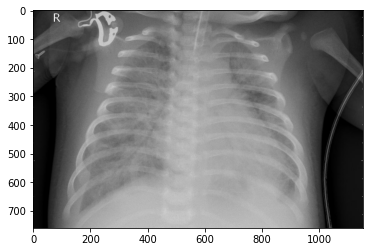

In [42]:
prediction('/content/PNEUMONIA(0).jpg')

(1317, 1855, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 19ms/step
[[0.2787587  0.48248824 0.23875305]]
1
NORMAL


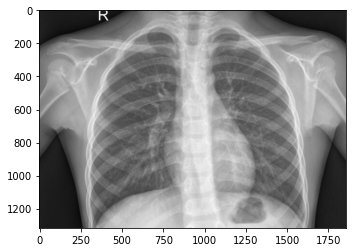

In [46]:
prediction('/content/NORMAL(0).jpg')

(1163, 1165, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 25ms/step
[[0.5500186  0.12164354 0.32833782]]
0
COVID19


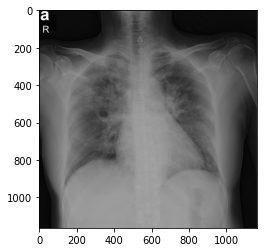

In [48]:
prediction('/content/COVID19(12).jpg')